In [1]:
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display

In [135]:
x_opt = ski.transform.resize(ski.data.shepp_logan_phantom(), (100,100))
theta = np.linspace(0,180, endpoint= False, num=100)

def radon(x):
    return ski.transform.radon(x, theta)/x.shape[-1]

def radon_adjoint(y):
    return ski.transform.iradon(y,theta,filter_name=None) / (y.shape[-2]*np.pi/(2 * len(theta)))

y = radon(x_opt) + np.random.normal(loc = 0, scale= 0.01, size = [100,100])
 


In [136]:
def soft_shrinkage(x, alpha):
    return np.maximum(np.abs(x)-alpha, 0)*np.sign(x)

def gradient_step(x, y, A, A_adjoint, t):
    grad = A_adjoint(A(x) - y)
    return x - 2*t*grad

def ista(y, A, A_adjoint, prox, t, lamda, iter):
    x = ski.transform.iradon(y*y.shape[-2])

    for i in range(iter):#
        e = np.linalg.norm(A(x)-y)**2 + lamda*np.linalg.norm(x, ord=1)
        print('Iteration ' + str(i) + ', Energy: ' + str(e))
        lin_up = gradient_step(x, y, A, A_adjoint, t)
        x = prox(lin_up, lamda*t)
        
    return x


In [137]:
approx = []
for lamda in range(20):
    approx.append(ista(y, radon, radon_adjoint, soft_shrinkage, t=0.0003, lamda = lamda, iter = 50))


Iteration 0, Energy: 0.6362828005305823
Iteration 1, Energy: 0.636280422673128
Iteration 2, Energy: 0.6362780453066816
Iteration 3, Energy: 0.6362756684307899
Iteration 4, Energy: 0.6362732920449979
Iteration 5, Energy: 0.6362709161488537
Iteration 6, Energy: 0.6362685407419038
Iteration 7, Energy: 0.6362661658236963
Iteration 8, Energy: 0.6362637913937794
Iteration 9, Energy: 0.6362614174517016
Iteration 10, Energy: 0.6362590439970122
Iteration 11, Energy: 0.636256671029261
Iteration 12, Energy: 0.6362542985479975
Iteration 13, Energy: 0.6362519265527731
Iteration 14, Energy: 0.636249555043138
Iteration 15, Energy: 0.6362471840186442
Iteration 16, Energy: 0.6362448134788431
Iteration 17, Energy: 0.6362424434232872
Iteration 18, Energy: 0.6362400738515295
Iteration 19, Energy: 0.6362377047631232
Iteration 20, Energy: 0.6362353361576223
Iteration 21, Energy: 0.6362329680345804
Iteration 22, Energy: 0.6362306003935527
Iteration 23, Energy: 0.636228233234094
Iteration 24, Energy: 0.636225

In [138]:
def plot_lamda(idx):
    
    fig = plt.figure()
    plt.imshow(approx[idx])


slider = widgets.IntSlider(min = 0, max = 19, step = 1, value = 0, continuous_update = True)
interactive_plot = interactive(plot_lamda, idx = slider)
display(interactive_plot)

interactive(children=(IntSlider(value=0, description='idx', max=19), Output()), _dom_classes=('widget-interact…

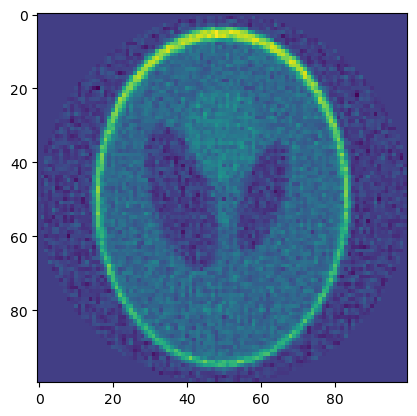

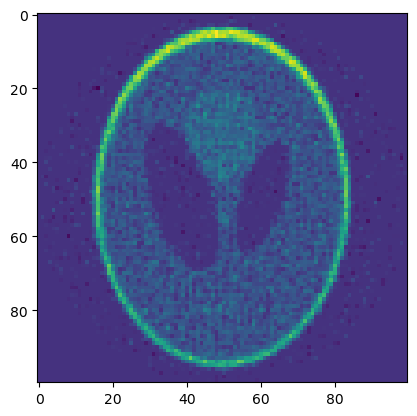

In [119]:
plt.imshow(ski.transform.iradon(y,theta))
plt.figure()
plt.imshow(approx)

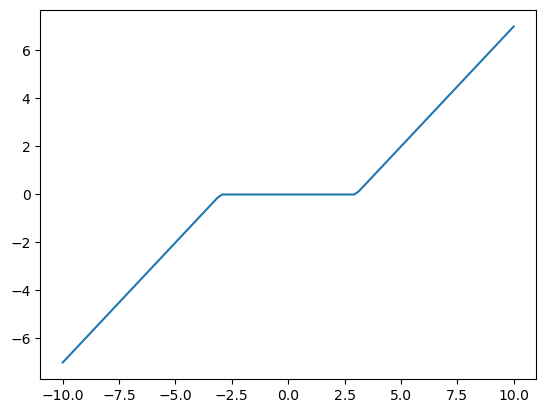

In [16]:
alpha = 3
x = np.linspace(-10,10,num=100)
prox_x = soft_shrinkage(x, alpha)
plt.plot(x, prox_x)